In [1]:
import requests # apis
from datetime import datetime
import re

In [2]:
# constants
URL = 'https://production.api.coindesk.com/v2/price/values/{coin}?start_date={start}&end_date={end}&ohlc=true'

AVAILABLE_COINS = [
    'BTC', 'ETH', 'XRP', 'BCH', 'ADA', 'XLM', 'NEO', 'LTC', 'EOS', 'XEM', 
    'IOTA', 'DASH', 'XMR', 'TRX', 'ICX', 'ETC', 'QTUM', 'BTG', 
    'VET', 'LSK', 'USDT', 'OMG', 'STEEM', 'ZEC', 'SC', 'BNB', 'XVG', 
    'SNT', 'ZRX', 'REP', 'KCS', 'WAVES', 'MKR', 'DCR', 'BAT', 'DGB', 'LRC', 'GAS', 
    'KNC', 'DENT', 'POWR', 'SYS', 'BNT', 'REQ', 'GNO', 'LINK', 'QSP', 'CVC', 'RLC', 'ENJ', 
    'STORJ', 'ANT', 'SNGLS', 'THETA', 'ZEN', 'MANA', 'MLN', 'DNT', 'MOON', 'AMP', 'GTC', 
    'NMR', 'STX', 'LEO', 'GMT', 'POLIS', 'DOT', 'DAI', 'XCN', 'UNI', 'ATOM', 'GRT', 'LUNA', 'DAR', 
    'SCRT', 'IMX', 'ARB', 'OCEAN', 'ZIL', 'TRAC', 'MDT', 'HOT', 'XTZ', 'FIL', 'BIT', 'GMX', 'ZBC', 
    'HIGH', 'OP', 'ERN', 'NANO', 'WBTC', 'HT', 'OKB', 'BSV', 'DOGE', 'USDC', 'OXT', 'ALGO', 'BAND', 'BTT', 'FET',
    'KAVA', 'USDP', 'PAXG', 'REN', 'AAVE', 'YFI', 'NU', 'MATIC', 'ICP', 'SOL', 'SUSHI', 'UMA', 'SNX', 'CRV', 'COMP', 'CELO', 
    'KSM', 'NKN', 'SHIB', 'SKL', 'SAND', 'UST', 'AVAX', 'IOTX', 'AXS', 'XYO', 'ANKR', 'CHZ', 'LPT', 'COTI', 'KEEP', 'GALA', 'CRO', 
    'ACHP', 'JASMY', 'SLP', 'APE', 'BUSD', 'CAKE', 'EGLD', 'ENS', 'FTM', 'FTT', 'HBAR', 'MBOX', 'MINA', 'MOVR', 'NEAR', 'NEXO', 'POLS', 'QNT', 
    'QUICK', 'RUNE', 'RVN', 'WAXP', 'WRX', 'XEC', 'CEL', 'ALPACA', 'AUDIO', 'AVA', 'CHR', 'CKB', 'CLV', 'FARM', 'FLOW', 'GLMR', 'IDEX', 'INJ', 
    'JOE', 'MIR', 'POLY', 'PYR', 'RARE', 'RAY', 'ROSE', 'SFP', 'SRM', 'STMX', 'SUN', 'SXP', 'VGX', 'WOO', 'YGG', 'LUNC', 'APT', 'MASK', 'DYDX',
    'CTSI', 'CVX', 'FORTH', 'LDO', 'METIS', 'RBN', 'SAMO', 'SPELL', '1INCH', 'ALCX', 'ALICE', 'API3', 'ARPA', 'ASTR', 'BADGER', 'BAL', 'BICO',
    'BOBA', 'BOND', 'BTRST', 'C98', 'CELR', 'DIA', 'ETHW', 'GAL', 'GHST', 'GLM', 'HFT', 'ILV', 'KP3R', 'LCX', 'LOKA', 'LQTY', 'MC', 'MPL', 'MXC',
    'OGN', 'PERP', 'PDA', 'POND', 'RAD', 'RARI', 'RLY', 'RNDR', 'RPL', 'STG', 'SYN', 'T', 'TLM', 'TRU', 'UNFI', 'AR', 'FXS', 'GUSD', 'KLAY', 'TUSD',
    'XDC', 'XRD', 'USDD', 'TON', 'TWT', 'HNT', 'OSMO', 'ATLAS', 'BFC', 'BLUR', 'BABYDOGE', 'CEEK', 'ELON', 'FLOKI', 'KISHU', 'LOOKS', 'ONE', 'RACA', 'REEF',
    'SAITAMA', 'WIN', 'AGLD', 'TOKE', 'GST', 'CSPR', 'GT', 'PEPE', 'BLZ', 'FLR', 'FIS', 'GNS', 'ID', 'AXL', 'WEMIX', 'VLX', 'HMT', 'DG', 'SWEAT', 'BONE', 
    'SANTOS', 'SUI', 'TVK', 'BONK', 'PIT', 'CORE', 'BRISE', 'KAS', 'AGIX', 'XEN', 'HAM', 'TAMA', 'KDA', 'CFX', 'VRA', 'BDX', 'RDNT', 'WLD', 'FB', 'PYUSD', 
    'SEI', 'TOMI', 'AKT', 'MAGIC', 'ALPHA', 'ALI', 'CQT', 'AERGO', 'GODS', 'ACA', 'LIT', 'QI', 'AURORA', 'XCH', 'STRK', 'MANTA', 
    'PYTH', 'EETH', 'TIA', 'ETHFI', 'WIF', 'ACS', 'AIOZ', 'BIGTIME', 'DYM', 'ELA', 'JTO', 'JUP', 'ONDO', 'ORCA', 'PRIME', 'TRB', 'ZETA', 'USDE'
]

In [4]:
# functions and execution
# looking and reading and investigating 

# You are not for how-to-do items, but why-to-do items
# 60-70% of data-related work is about understanding the data and the goals/business use

# ------------------------- This data scraping using APIs
def uri_generator(coin: str, start: int, end: int): # make him send on day level
    if coin not in AVAILABLE_COINS:
        raise ValueError(f"The provided coin '{coin}' is not within the list of available coins: {AVAILABLE_COINS}")
        
    completion = 'T00:00'
    try:
        start = datetime.strptime(str(start), '%Y%m%d').strftime(f'%Y-%m-%d{completion}')
        end = datetime.strptime(str(end), '%Y%m%d').strftime(f'%Y-%m-%d{completion}')
    except Exception as e:
        raise e
    
    return URL.format(
        coin=coin,
        start=start,
        end=end
    )

def retrive_data(uri):
    print(uri)
    result = requests.get(uri)
    try:
        result.raise_for_status()
    except Exception as e:
        raise e

    return result.json()
# ------------------------------------------------------------

# ------------------------- This data engineering

# ETL or ELT


In [5]:
uri = uri_generator('ETH', start=20220101, end=20230101)
data = retrive_data(uri)
# result = requests.get(res)
data
# result.json()['data']['entries']

https://production.api.coindesk.com/v2/price/values/ETH?start_date=2022-01-01T00:00&end_date=2023-01-01T00:00&ohlc=true


{'statusCode': 200,
 'message': 'OK',
 'data': {'iso': 'ETH',
  'name': 'Ethereum',
  'slug': 'ethereum',
  'ingestionStart': '2015-08-09',
  'interval': '1d',
  'entries': [[1641081599000,
    3677.0807012771,
    3778.0718523218,
    3677.0098847936,
    3762.3022374309],
   [1641167999000,
    3767.346676672,
    3854.5020537363,
    3723.137152619,
    3831.2906061045],
   [1641254399000,
    3831.7044109714,
    3852.7545296496,
    3683.2033821066,
    3756.3847345229],
   [1641340799000,
    3765.5034182478,
    3885.0467050211,
    3716.0387260082,
    3819.0673159587],
   [1641427199000,
    3785.1288862026,
    3847.5734252035,
    3417.5953640449,
    3528.7144310736],
   [1641513599000,
    3541.0047910986,
    3551.7131346109,
    3307.1988438983,
    3425.7560558494],
   [1641599999000,
    3407.4871603294,
    3416.0412270047,
    3087.3299235919,
    3187.5482924524],
   [1641686399000,
    3198.2406071344,
    3250.3366605723,
    3001.8464204957,
    3131.8720138719],

<Axes: >

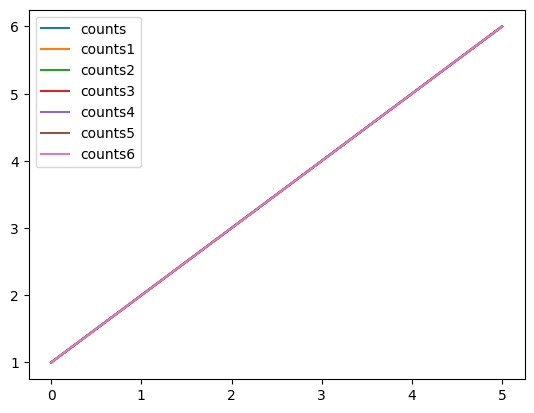

In [9]:
df.plot()